# Final Project: Stock Data and Revenue Dashboard for Tesla & GameStop

**Name:** Syed Shoaib

**Course:** Data Science

---

### 📌 Question 1 - Extracting Tesla Stock Data Using yfinance

In [1]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### 📌 Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}

try:
    # Get and parse HTML
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # Find the revenue table
    for table in soup.find_all("table"):
        if "Revenue" in table.text:
            tesla_revenue = pd.read_html(StringIO(str(table)))[0]
            break

    # Clean the data
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[\$,]", "", regex=True).astype(float)

    # Show result
    print(tesla_revenue.head())

except Exception as e:
    print(f"Error: {e}")


   Date  Revenue
0  2024  97690.0
1  2023  96773.0
2  2022  81462.0
3  2021  53823.0
4  2020  31536.0


### 📌 Question 3 - Extracting GameStop Stock Data Using yfinance

In [6]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### 📌 Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}

# Fetch the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables on the page
tables = soup.find_all("table")

# Find the table with "Revenue" in headers
for table in tables:
    if "Revenue" in table.text:
        gme_revenue = pd.read_html(StringIO(str(table)))[0]
        break

# Clean the data
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"[\$,]", "", regex=True).astype(float)

# Show top rows
print(gme_revenue.head())


   Date  Revenue
0  2025   3823.0
1  2024   5273.0
2  2023   5927.0
3  2022   6011.0
4  2021   5090.0


### 📌 Question 5 - Tesla Stock and Revenue Dashboard

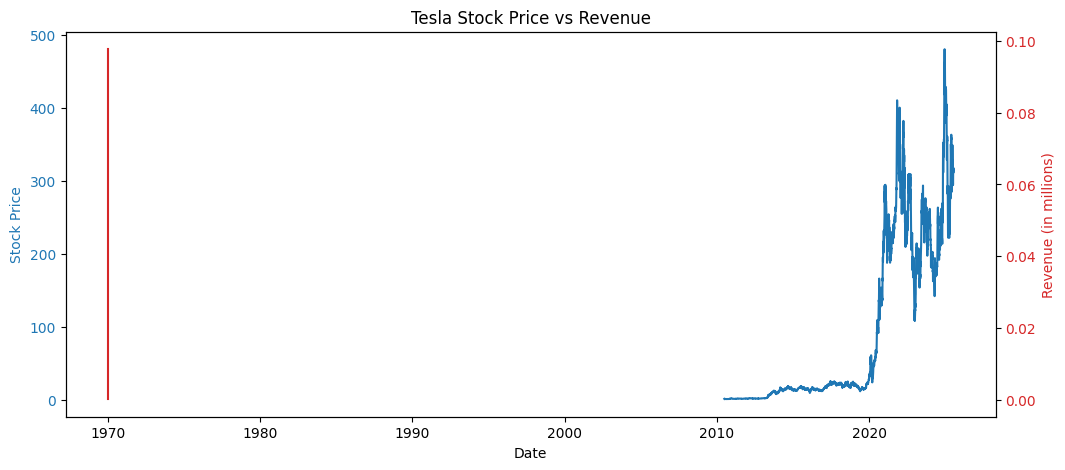

In [11]:
import matplotlib.pyplot as plt

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

fig, ax1 = plt.subplots(figsize=(12,5))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(tesla_data['Date'], tesla_data['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Revenue (in millions)', color=color)
ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'].astype(float)/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Tesla Stock Price vs Revenue")
plt.show()

### 📌 Question 6 - GameStop Stock and Revenue Dashboard

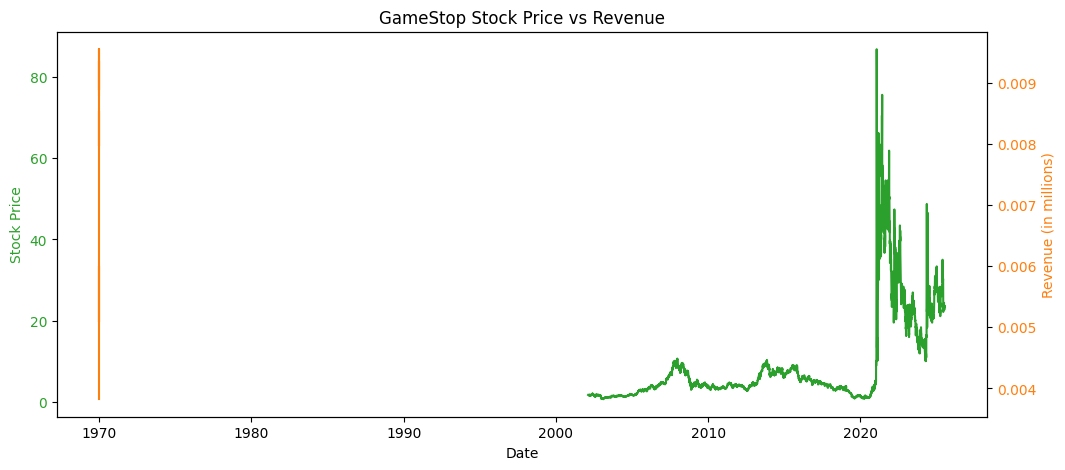

In [12]:
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_data["Date"] = pd.to_datetime(gme_data["Date"])

fig, ax1 = plt.subplots(figsize=(12,5))
color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(gme_data['Date'], gme_data['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Revenue (in millions)', color=color)
ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'].astype(float)/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("GameStop Stock Price vs Revenue")
plt.show()

### 📌 Question 7 - Sharing Your Assignment Notebook

Save this notebook as `final_project.ipynb` and upload it along with your screenshots.